In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('ds_salaries.csv', index_col = 0)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
# number of rows and columns
df.shape

(607, 11)

In [6]:
# number of null values per column
df.isnull().sum(axis = 0)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
# no null values means that there are 607 records to use in the analysis

### Q1 - How is salary_in_usd impacted by remote_ratio?

<AxesSubplot:>

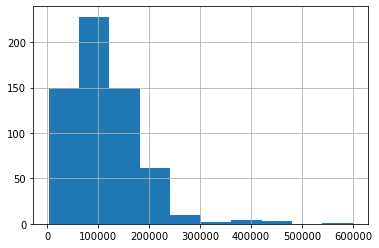

In [56]:
df['salary_in_usd'].hist()

In [12]:
# find the mean of salary in usd

df['salary_in_usd'].mean()



112297.86985172982

In [11]:
# find the median of salary in usd

df['salary_in_usd'].median()

101570.0

In [28]:
# find the mean salary in usd per remote_ratio

pd.pivot_table(df, index = 'remote_ratio', values = 'salary_in_usd', aggfunc = 'mean')

,salary_in_usd
remote_ratio,
0,106354.622047
50,80823.030303
100,122457.454068


In [26]:
# find the median salary in usd per remote_ratio

pd.pivot_table(df, index = 'remote_ratio', values = 'salary', aggfunc = 'median')

,salary
remote_ratio,
0,102100
50,76760
100,123000


In [49]:
# create dataframe of means and medians

data_salary_in_usd = {'mean': [112298, 106355, 80823, 122457],
                      'median': [101570, 102100, 76760, 123000]}

df_salary_in_usd = pd.DataFrame(data_salary_in_usd, index = ['All Salaries',
                                                            'No Remote Work',
                                                            'Partial Remote Work',
                                                            'Full Remote'])

df_salary_in_usd

,mean,median
All Salaries,112298,101570
No Remote Work,106355,102100
Partial Remote Work,80823,76760
Full Remote,122457,123000


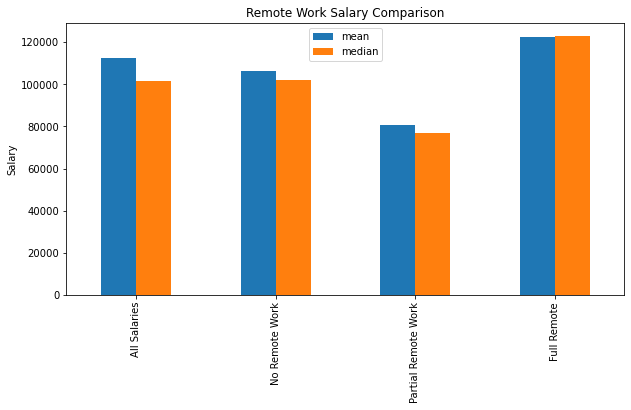

In [69]:
df_salary_in_usd.plot(y = ['mean', 'median'], kind = 'bar', figsize=(10, 5));
plt.title('Remote Work Salary Comparison');
plt.ylabel('Salary');

### Q2 - How is remote_ratio impacted by experience_level?

In [70]:
# get value count of remote_ratio

df['remote_ratio'].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

In [71]:
# get value count of experience_level

df['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [77]:
pd.crosstab(df.remote_ratio, df.experience_level, normalize = 'columns')

experience_level,EN,EX,MI,SE
remote_ratio,,,,
0,0.159091,0.115385,0.262911,0.192857
50,0.284091,0.192308,0.197183,0.096429
100,0.556818,0.692308,0.539906,0.710714


In [86]:
# create dataframe for normalized remote_ratio and experience_level

#EN = Entry Level/Junior
#MI = Mid Level/Intermediate
#SE = Senior Level/Expert
#EX = Executive Level/Director

data_experience_level = {'EN': [0.16, 0.28, 0.56],
                      'MI': [0.26, 0.20, 0.54],
                     'SE': [0.19, 0.10, 0.71],
                     'EX': [0.12, 0.19, 0.69]}

df_remote_experience_level = pd.DataFrame(data_experience_level, index = ['No Remote Work',
                                                            'Partial Remote Work',
                                                            'Full Remote'])

df_remote_experience_level

,EN,MI,SE,EX
No Remote Work,0.16,0.26,0.19,0.12
Partial Remote Work,0.28,0.20,0.10,0.19
Full Remote,0.56,0.54,0.71,0.69


In [84]:
df_remote_experience_level = df_remote_experience_level.T

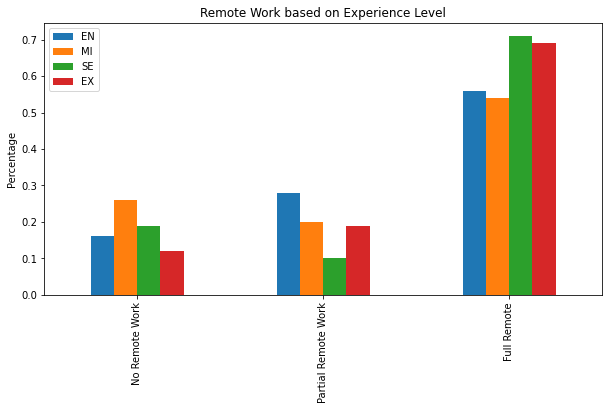

In [89]:
df_remote_experience_level.plot(y = ['EN', 'MI', 'SE', 'EX'], kind = 'bar', figsize=(10, 5));
plt.title('Remote Work based on Experience Level');
plt.ylabel('Percentage');

In [90]:
#A majority of all experience levels are working Full Remote. Therefore, experience level does not appear to
#have an impact on remote ratio

### Q3 - How is remote ratio impacted by company size?

In [91]:
pd.crosstab(df.remote_ratio, df.company_size, normalize = 'columns')

company_size,L,M,S
remote_ratio,,,
0,0.161616,0.242331,0.192771
50,0.303030,0.064417,0.216867
100,0.535354,0.693252,0.590361


In [100]:
# create dataframe for normalized remote_ratio and company_size


data_company_size = {'L': [0.16, 0.30, 0.54],
                      'M': [0.24, 0.06, 0.69],
                     'S': [0.19, 0.22, 0.59]}

df_remote_company_size = pd.DataFrame(data_company_size, index = ['No Remote Work',
                                                            'Partial Remote Work',
                                                            'Full Remote'])

df_remote_company_size

,L,M,S
No Remote Work,0.16,0.24,0.19
Partial Remote Work,0.30,0.06,0.22
Full Remote,0.54,0.69,0.59


In [98]:
df_remote_company_size = df_remote_company_size.T

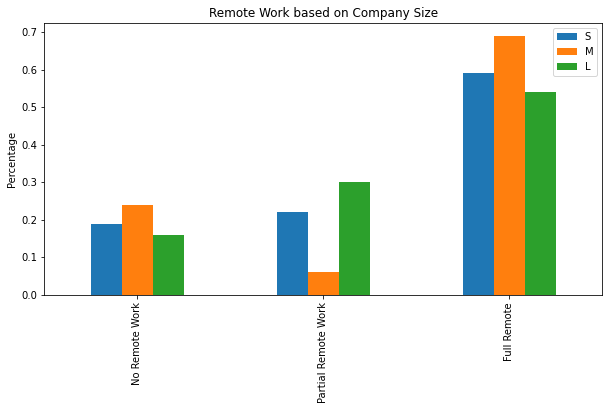

In [101]:
df_remote_company_size.plot(y = ['S', 'M', 'L'], kind = 'bar', figsize=(10, 5));
plt.title('Remote Work based on Company Size');
plt.ylabel('Percentage');

In [ ]:
# Again Company Size appears to have very little impact on remote_ratio